In [2]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [5]:
df_skills = df.copy() 
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)



# df_exploded = df.explode('job_skills')
# skill_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()
# df_skills_count = skill_count.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)

In [6]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


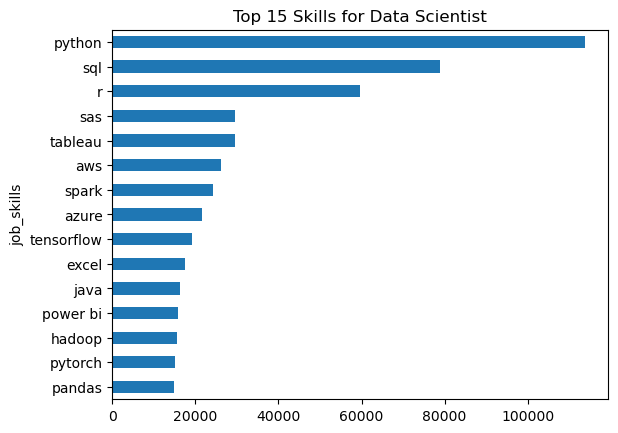

In [7]:
job_title = 'Data Scientist'
top_skills = 15

df_top_skills = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_top_skills.plot(kind='barh', x='job_skills', y='skill_count', legend=False)

plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.show()